In [1]:
!pip3 install snscrape

In [2]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 3.8 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=23386689b0f6d7c015dc6c73ca45abeffef30f677ff769cc85831d59ce96335e
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [3]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

In [4]:
keywords=['transformers']
start="2022–09–01"
end ="2022–10–03"
max_num=100
fname='tweet.json' 
languages=['de','en']

In [5]:
import pandas as pd
datatw=[]

In [6]:
for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
            datatw.append(tweet.content)
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                print(line)
                f.write(line)
                f.write('\n')

{"id": 1581886476446359552, "username": "AuthorMyosotis", "date": "2022-10-17 05:55:00+00:00", "text": "a transformer, ready to devour him.\n\n\"I can’t do it,\" Tobio muttered.\n\nBehind the wheel, looking at her brother, Miwa was about to protest when Tobio suddenly spun around, bent over and stuck his head through the open window.", "url": "https://twitter.com/AuthorMyosotis/status/1581886476446359552"}
{"id": 1581886316723458048, "username": "WkdHellboy", "date": "2022-10-17 05:54:22+00:00", "text": "@BbqDeveloper Soundwave has always been hot, every generation of Transformers he’s the best. One of my favourite Soundwave moments: https://t.co/PrwWB4s9J9", "url": "https://twitter.com/WkdHellboy/status/1581886316723458048"}
{"id": 1581886276084457474, "username": "ohmyprimus", "date": "2022-10-17 05:54:12+00:00", "text": "⭐ [𝗣𝗿𝗲-𝗼𝗿𝗱𝗲𝗿] Magic Square MS Toys - MS-B16A B16-A Strong Man (Transformers G1 Legends Scale Huffer Metallic Ver.) ⭐️\nhttps://t.co/sh4SFz0UKI https://t.co/vKGiRbw9

In [7]:
datatw

['a transformer, ready to devour him.\n\n"I can’t do it," Tobio muttered.\n\nBehind the wheel, looking at her brother, Miwa was about to protest when Tobio suddenly spun around, bent over and stuck his head through the open window.',
 '@BbqDeveloper Soundwave has always been hot, every generation of Transformers he’s the best. One of my favourite Soundwave moments: https://t.co/PrwWB4s9J9',
 '⭐ [𝗣𝗿𝗲-𝗼𝗿𝗱𝗲𝗿] Magic Square MS Toys - MS-B16A B16-A Strong Man (Transformers G1 Legends Scale Huffer Metallic Ver.) ⭐️\nhttps://t.co/sh4SFz0UKI https://t.co/vKGiRbw9Ti',
 '@KenyaPower_Care Good morning thank you for helping to resolve the power outage with our transformer. However the issue has not been fully resolved. We still have no power in one section of our house. We’re on 3 phase.',
 "Update I'm still high but now I'm playing Transformer Falls  Cybertron so far I'm grimlock",
 "@ARCTIC_ST0RM I'm scared to ask but whats diaclone?\n\nIs it the same Transformer but other bodies or is it how clo

In [8]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 3.9 MB/s 


In [9]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in datatw:

    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove URL
    document_test = re.sub(r'http\S+', '', document_test)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)

    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)
    documents_clean.append(outputstop)

In [15]:
documents_clean[0:5]

['a transformer ready to devour him i can t do it tobio muttered behind the wheel looking at her brother miwa was about to protest when tobio suddenly spun around bent over and stuck his head through the open window ',
 ' soundwave has always been hot every generation of transformers he s the best one of my favourite soundwave moments ',
 ' magic square ms toys ms ba b a strong man transformers g legends scale huffer metallic ver ',
 ' good morning thank you for helping to resolve the power outage with our transformer however the issue has not been fully resolved we still have no power in one section of our house we re on phase ',
 'update i m still high but now i m playing transformer falls cybertron so far i m grimlock']

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

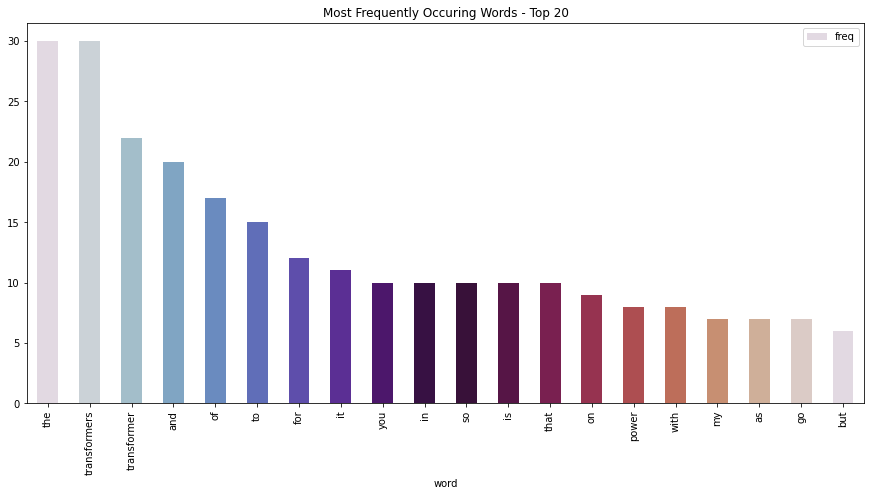

In [17]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

In [18]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [19]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 transformers
 the
 transformer
 of
 and
 to
 for
 so
 is
 in
Cluster 1:
 of
 extremely
 it
 the
 opposite
 kind
 are
 was
 newest
 ice
Cluster 2:
 and
 prime
 has
 as
 book
 the
 ties
 on
 found
 out




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
print("Prediction")
Y = cv.transform(["piala dunia"])
prediction = model.predict(Y)
print("Cluster number :", prediction)
Y = cv.transform(["ronaldo"])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Prediction
Cluster number : [0]
Cluster number : [0]


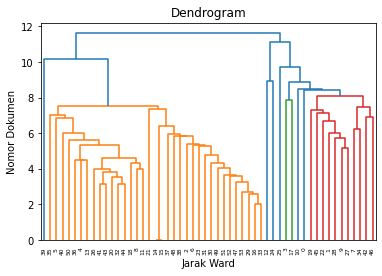

In [21]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

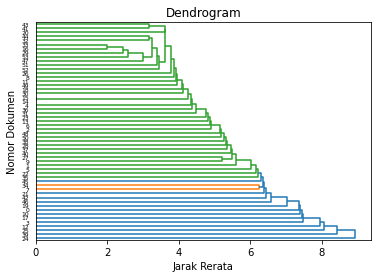

In [22]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X) 
print(cluster.labels_)

[0 0 1 0 1 1 1 0 1 0 0 1 5 1 1 1 1 0 1 0 1 1 0 1 2 4 1 0 0 1 1 1 1 1 0 1 1
 1 1 3 1 1 0 1 1 0 0 1 1 1 1 1 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


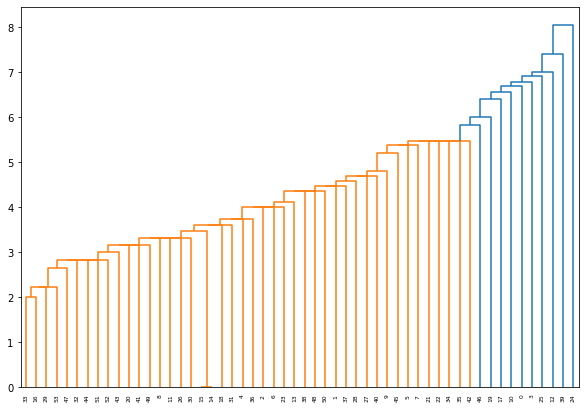

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(0, len(cluster.labels_))

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

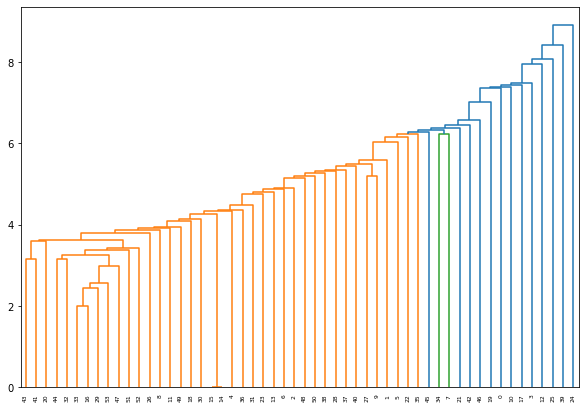

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'average')

labelList = range(0, len(cluster.labels_))

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True);
plt.show()